# Please read:

We have already defined the dataset below. 
And also have defined X_train and y_train. Please build a model and test it with X_test.


You should build a neural network model in Keras.

# Section A

In [24]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

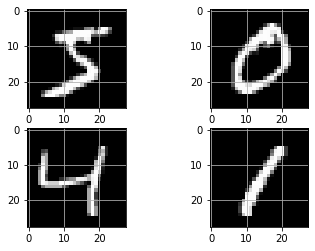

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

In [26]:
# In the preceding code, we are importing the relevant Keras files and are also importing the MNIST dataset 
#(which is provided as a built-in dataset in Keras). 

# The MNIST dataset contains images of digits where the images are of 28 x 28 in shape. 
# You can see in the plots what they will look like.

# Section B - HW Neural Network starts here

In [27]:
# 1. Import the relevant packages and datasets

In [139]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [140]:
#2. Preprocess the targets (convert them into one-hot encoded vectors) so that we can perform optimization on top of them:
#We shall be minimizing categorical cross entropy loss
#- 2points

In [141]:
import numpy as np
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [142]:
#3. Initialize a model - 1 point

In [143]:
from keras import optimizers
from keras.layers import Flatten
from keras.layers import BatchNormalization

np.random.seed(16)
model=Sequential()
input_shape = X_train[0].shape
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the model architecture:
Specify the number of units in a hidden layer
Specify the activation function that is to be performed in a hidden layer
Specify the number of hidden layers
Specify the loss function that we want to minimize
Provide the optimizer that will minimize the loss function

In [144]:
#5. Fit the model 

In [145]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=False)

In [ ]:
#6. Test the model

In [149]:
y_test_pred=model.predict_classes(X_test)

In [ ]:
#7. Calculate the accuracy and loss values on top of the test dataset - 2 points

In [146]:
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Loss:%.2f%%"%(scores[0]*100))
print("Training Accuracy:%.2f%%\n"%(scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Test Loss:%.2f%%"%(scores[0]*100))
print("Test Accuracy:%.2f%%\n"%(scores[1]*100))
model.summary()

Training Loss:21.99%
Training Accuracy:96.16%

Test Loss:27.09%
Test Accuracy:95.17%

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_39 (Dense)             (None, 16)                12560     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dense_40 (Dense)             (None, 10)                170       
Total params: 15,930
Trainable params: 14,330
Non-trainable params: 1,600
_________________________________________________________________


# HW - Decision Trees

### Please follow the instructions given during the class/demo

### Load sklearn's wine dataset and perform classification using Decision trees. Try different pruning techniques, criteria to split the tree which gives you best results. Plot the three and comment on your findings.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn import datasets

raw_data = datasets.load_wine()
#print(data)
print(list(raw_data.target_names))
print(raw_data['DESCR'])
print('data.shape\t',raw_data['data'].shape,'\ntarget.shape \t',raw_data['target'].shape)

['class_0', 'class_1', 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
 

In [2]:
features = pd.DataFrame(data=raw_data['data'], columns=raw_data['feature_names'])
data = features
#print(data)
data['target']=raw_data['target'] 
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [417]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(raw_data['data'], raw_data['target'], test_size=0.2, random_state=42)

In [7]:
'''criteria_max_depth = [1,2,3,4,5]
criteria_min_samples_leaf = [1,2,3,4,5]
for dp in criteria_max_depth:
    for ml in criteria_min_samples_leaf:
        clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=dp, min_samples_leaf=ml) 
        clf_gini.fit(X_train, y_train) 
        y_pred = clf_gini.predict(X_test) 
        print ("dep: {0}, min: {1}, score: {2} ".format(dp, ml, accuracy_score(y_test,y_pred)*100))'''

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=2)
clf_gini.fit(X_train, y_train) 
y_pred = clf_gini.predict(X_test) 
print ("score: {0} ".format(accuracy_score(y_test,y_pred)*100))

score: 94.44444444444444 


In [6]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf_gini, out_file=None, feature_names=raw_data['feature_names'], class_names=list(raw_data.target_names), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [444]:
'''criteria_max_depth = [1,2,3,4,5]
criteria_min_samples_leaf = [1,2,3,4,5]
for dp in criteria_max_depth:
    for ml in criteria_min_samples_leaf:
        clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=dp, min_samples_leaf=ml)
        clf_entropy.fit(X_train, y_train) 
        y_pred_enp = clf_entropy.predict(X_test)
        print ("dep: {0}, min: {1}, score: {2} ".format(dp, ml, accuracy_score(y_test,y_pred_enp)*100))'''


clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train) 
y_pred_enp = clf_entropy.predict(X_test)
print ("score: {0} ".format(accuracy_score(y_test,y_pred_enp)*100))

score: 94.44444444444444 


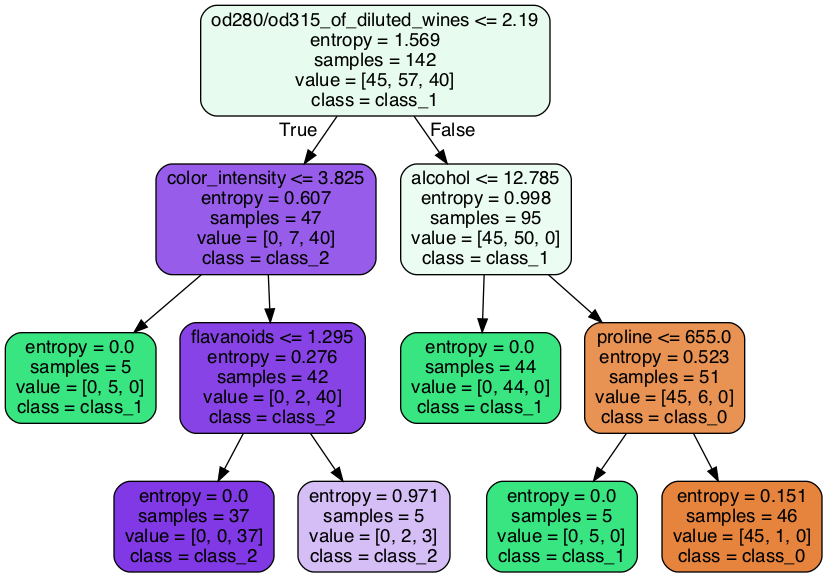

In [459]:
dot_data = export_graphviz(clf_entropy, out_file=None, feature_names=raw_data['feature_names'], class_names=list(raw_data.target_names), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

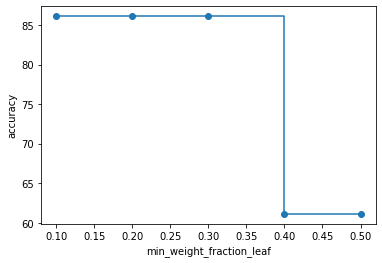

[86.11111111111111, 86.11111111111111, 86.11111111111111, 61.111111111111114, 61.111111111111114]


In [448]:
prns=[0.1, 0.2, 0.3, 0.4 ,0.5]
scores=[]
for prn in prns :
    clf_prn = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_weight_fraction_leaf=prn)
    clf_prn.fit(X_train, y_train)
    y_pred_prn = clf_prn.predict(X_test) 
    score = accuracy_score(y_test,y_pred_prn)*100
    scores.append(score)
    
    
fig = plt.figure()
ax = plt.axes()
ax.plot(prns,scores,marker='o', drawstyle="steps-post")
ax.set_xlabel("min_weight_fraction_leaf")
ax.set_ylabel("accuracy") 
plt.show()
print(scores)

### Let's study about p#cost_complexity_pruning_path returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.ost pruning decision trees with cost complexity pruning

In [449]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

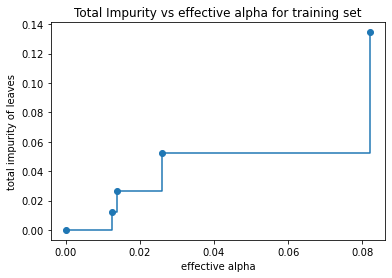

In [450]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [451]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2623158561335511


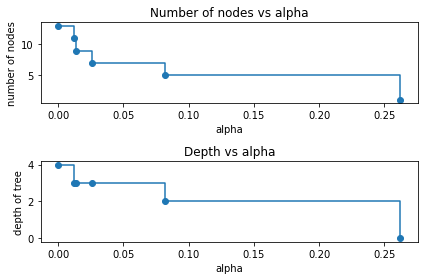

In [452]:
#clfs = clfs[:-1]
#ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

#print(len(node_counts))
#print(len(depth))

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# when alpha increases, the number of nodes and depth of tree decrease.

[0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.8611111111111112, 0.3888888888888889]


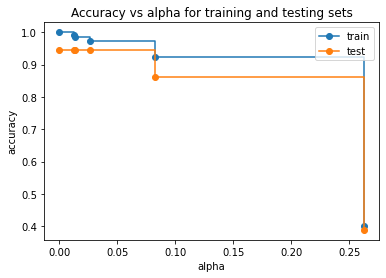

In [453]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
print(test_scores)
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

best score is 94.
